In [1]:
import sys
sys.path.append('../../')
from tools.img import rgb2lab, tensor2ndarray, ndarray2tensor, rgb_tensor_to_lab_tensor, lab_tensor_to_rgb_tensor

import PIL.Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.transforms.transforms import ToTensor

In [2]:
x_rgb = PIL.Image.open('/home/chengyiqiu/code/SanDiffusion/data/imagenette2/train/n01440764/ILSVRC2012_val_00000293.JPEG').resize((256, 256))
x_rgb = np.array(x_rgb)
x_lab = rgb2lab(x_rgb)
x_lab.shape

(256, 256, 3)

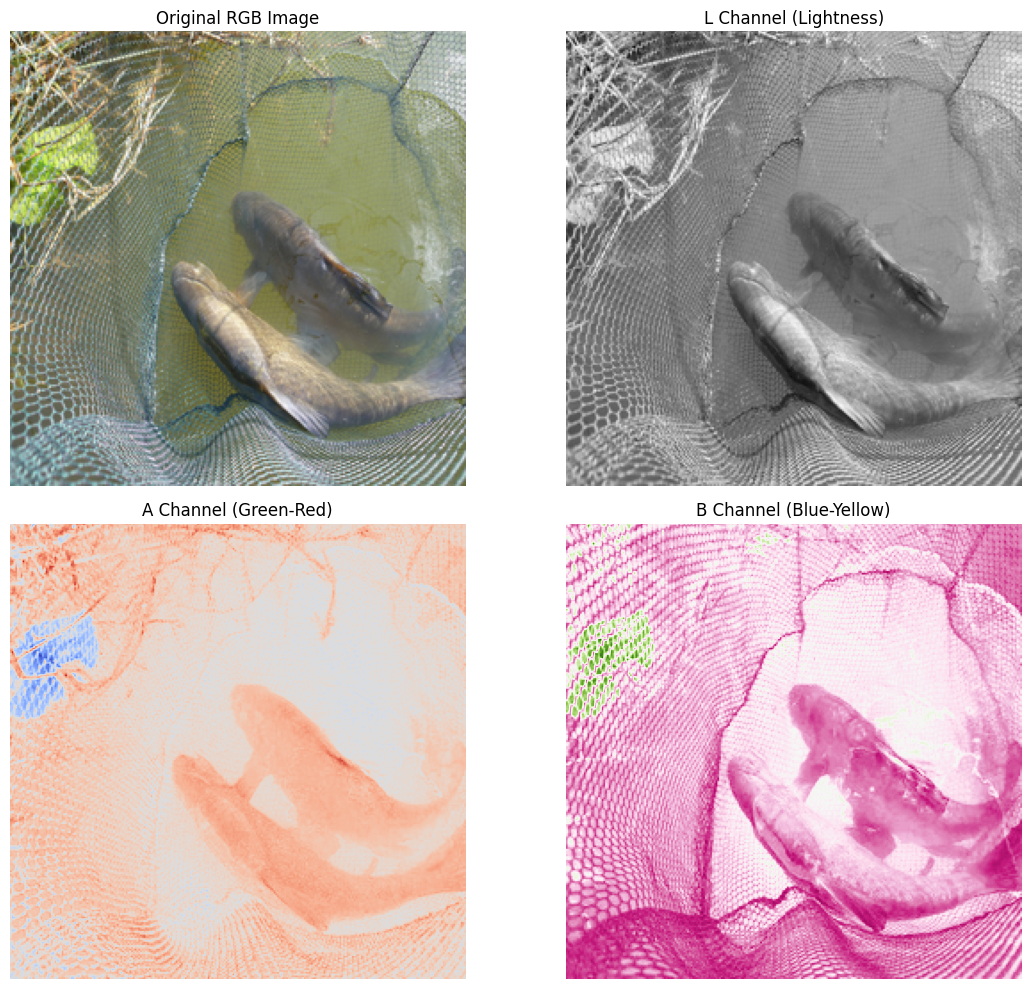

In [3]:
# Plot the original RGB image and LAB channels
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original RGB image
axes[0, 0].imshow(x_rgb)
axes[0, 0].set_title("Original RGB Image")
axes[0, 0].axis('off')

# L channel (Lightness)
axes[0, 1].imshow(x_lab[:, :, 0], cmap='gray')
axes[0, 1].set_title("L Channel (Lightness)")
axes[0, 1].axis('off')

# A channel (Green-Red)
axes[1, 0].imshow(x_lab[:, :, 1], cmap='coolwarm')
axes[1, 0].set_title("A Channel (Green-Red)")
axes[1, 0].axis('off')

# B channel (Blue-Yellow)
axes[1, 1].imshow(x_lab[:, :, 2], cmap='PiYG')
axes[1, 1].set_title("B Channel (Blue-Yellow)")
axes[1, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

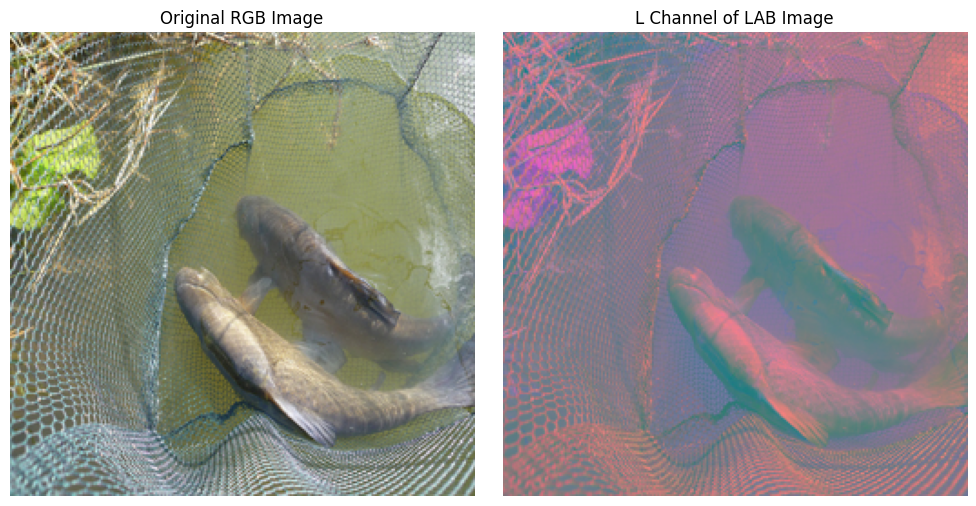

In [4]:
x_0 = ndarray2tensor(x_rgb)
rgb_tensor = x_0
batch_size = 4
rgb_batch_tensor = rgb_tensor.unsqueeze(0).repeat(batch_size, 1, 1, 1)  # Shape: (4, 3, 256, 256)
lab_batch_tensor = rgb_tensor_to_lab_tensor(rgb_batch_tensor)  # Shape: (4, 3, 256, 256)
lab_batch_tensor.clip_(0, 1)
rgb_batch_tensor = lab_tensor_to_rgb_tensor(lab_batch_tensor)
rgb_batch_tensor.clip_(0, 1)
lab_np = tensor2ndarray(lab_batch_tensor[0])  # Shape: (256, 256, 3)
rgb_np = tensor2ndarray(rgb_batch_tensor[0])  # Shape: (256, 256, 3)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(rgb_np)
axes[0].set_title("Original RGB Image")
axes[0].axis('off')
l_channel = lab_np[:, :, 0]  # Extract the L channel
axes[1].imshow(lab_np)
axes[1].set_title("L Channel of LAB Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()